# **Importing and Understanding the dataset**

In [2]:
#import data

In [3]:
from sklearn import linear_model

import pandas as pd
import numpy as np

# import the metrics class
from sklearn import metrics

from sklearn.metrics import f1_score


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#get data

df = pd.read_csv("https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv")

In [5]:
df.columns #check what columns we have

Index(['cvd_4types', 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

In [6]:
df.info() #understanding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [7]:
#checking if we could possibly have a class imbalance
df.groupby('cvd_4types').size()

cvd_4types
0    1329
1    1913
dtype: int64

# **Training Model & Prediction**

In [8]:
#split dataset in features and target variable
feature_cols = ['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25']
X = df[feature_cols] # Features
y = df.cvd_4types # Target variable


In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#fit linear regression classifier

clf = linear_model.LogisticRegression(C=1e140, solver = 'newton-cg')

fitted_model = clf.fit(X_train,y_train)


In [11]:

#predict

y_pred =clf.predict(X_test)

y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

# **Evaluation**

In [12]:
#create confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix


array([[148, 169],
       [ 89, 405]])

Text(0.5, 257.44, 'Predicted label')

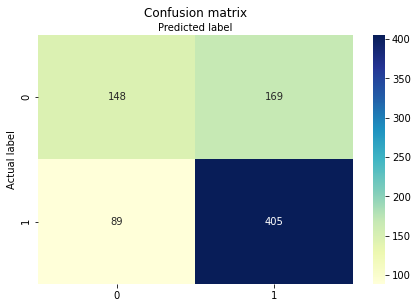

In [13]:
#seeing it as a heatmap. I thought this was really cool so I decided to add it
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
#find the accuracy, precision, recall, f1-score, ROC Curve
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1score = f1_score(y_test, y_pred)

#creating evaluation table 
evaluation_table  = {"Accuracy": Accuracy, "Precision": Precision, "Recall": Recall, "F1score":F1score }

evaluation_df = pd.Series(evaluation_table).to_frame()

evaluation_df = evaluation_df.rename(columns={0:"Score"})

evaluation_df

,Score
Accuracy,0.681874
Precision,0.705575
Recall,0.819838
F1score,0.758427


In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
#Defining a python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [17]:
#Predict probabilities for the test data.
probs = clf.predict_proba(X_test)

#Keep Probabilities of the positive class only.
probs = probs[:, 1]

AUC: 0.69


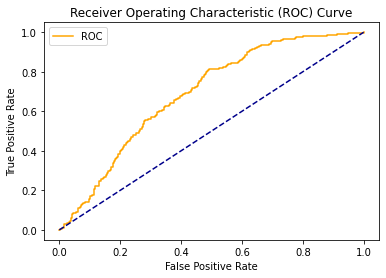

0.7182947801293552

In [18]:
#AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve
plot_roc_curve(fpr, tpr)


#cross-validated AUC
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean()

# **Feature Importance**

In [19]:
m = linear_model.LogisticRegression()

m.fit(X/ np.std(X, 0),y)

print(m.coef_)

coefss = m.coef_


[[ 8.65518062e-03 -3.71281981e-01  1.82519151e-01 -1.36923714e-01
  -6.03138231e-01 -1.82348735e-01  1.12619581e+00 -2.33006991e-01
   6.11148106e-04 -6.65511918e-02  7.27625551e-02  1.59314337e-01
   8.81622694e-02 -8.32966741e-02  1.17355362e-01 -3.62121046e-01]]


In [20]:
df.columns

Index(['cvd_4types', 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

In [21]:
data = {'features':['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],'coefficients':[8.65518062e-03, -3.71281981e-01  ,1.82519151e-01 ,-1.36923714e-01
  ,-6.03138231e-01 ,-1.82348735e-01 , 1.12619581e+00 ,-2.33006991e-01,
   6.11148106e-04 ,-6.65511918e-02  ,7.27625551e-02,  1.59314337e-01,
   8.81622694e-02 ,-8.32966741e-02 , 1.17355362e-01, -3.62121046e-01]}

coef_features = pd.DataFrame(data)

In [22]:
coef_table = coef_features.sort_values(by='coefficients', ascending=False)

coef_table


,features,coefficients
6,waist,1.126196
2,educat,0.182519
11,parrptdiab,0.159314
14,tired25,0.117355
12,bend25,0.088162
10,srhype,0.072763
0,age_s1,0.008655
8,cgpkyr,0.000611
9,tea15,-0.066551
13,happy25,-0.083297
